# **Data Mining: Breast Cancer Classification Project**
## 1. Project Overview
In this project, we are going to use three different classification algorithms, Random Forest, LSTM, and KNN to classify a dataset of breast cancer cases. The goal is to categorize the cases into two groups: malignant (cancerous) and benign (non-cancerous). We’ll walk through the steps of data preprocessing, visualizing the data, training the models, evaluating their performance, and comparing the results to see which algorithm works best.
### 2. Using KNN, RF and LSTM To categorize the cases into two groups: malignant (cancerous) and benign (non-cancerous

### 2.1 Importing the packages and libraries that are required for the project

In [48]:
# Data manipulation and analysis
import pandas as pd  # Provides data structures and data analysis tools
import numpy as np   # Used for efficient numerical computations

# Data visualization
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For more advanced and attractive visualizations

# Machine learning tools and algorithms from scikit-learn
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, average_precision_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold  # For splitting data into train and test sets, and cross-validation
from sklearn.preprocessing import StandardScaler  # For normalizing data

# K-Nearest Neighbors and Random Forest classifiers
from sklearn.neighbors import KNeighborsClassifier  # KNN algorithm for classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for ensemble learning

# Deep learning with TensorFlow and Keras
from tensorflow.keras.models import Sequential  # For building sequential neural networks
from tensorflow.keras.layers import Dense, LSTM  # For adding layers to the neural network
from tensorflow.keras.utils import to_categorical  # For one-hot encoding categorical data

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

### 2.2 Loading Data from raw file (wbc.data)

In [49]:
# Load the data
data = pd.read_csv('datasets/wdbc.data', header=None)

### 2.2.1 Assign Column Names

In [50]:
# Assign Column Names
column_names = [
    "ID", "Diagnosis", 
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", 
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", 
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", 
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]
data.columns = column_names

### 2.2.2 To prepare for classification, convert the Diagnosis column to binary values (M = 1 for malignant, B = 0 for benign)

In [51]:
#Encode the Target Column
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

### 2.2.3 Save as .csv File 

In [52]:
# Save as .csv File 
data.to_csv('datasets/breast_cancer.csv', index=False)

### 2.2.4 Read as CSV file and Drop the ID Column

In [53]:
# Read the CSV file
data = pd.read_csv('datasets/breast_cancer.csv')
# Drop the ID Column, Since ID is not needed for classification tasks, you may drop it.
data = data.drop(columns=['ID'])

In [54]:
# Display the first few rows of the dataframe
data.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### 2.3 Data Visualization
**In this project, we use visualizations like pair plots, heatmaps, histograms, confusion matrices, ROC curves and more to look at the relationships between features and see how well the classification models are doing. These visualizations make it easier to interpret the data and compare the results from different models.**

### 2.3.1 Distribution of Diagnosis

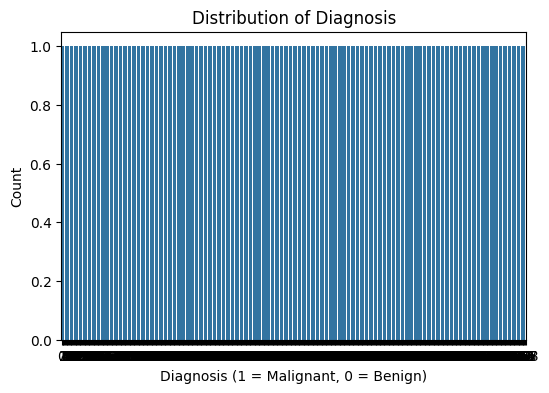

In [56]:
# Distribution of Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(data['Diagnosis'])
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis (1 = Malignant, 0 = Benign)")
plt.ylabel("Count")
plt.show()

### 2.3.2 Checking the Distribution of Diagnoses (Malignant vs Benign)

[1 0]


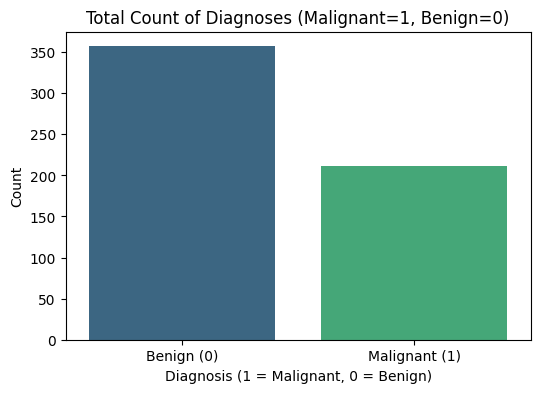

In [57]:
# Check the unique values in the Diagnosis column to confirm both classes are present
print(data['Diagnosis'].unique())

# Plotting the counts of Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=data, palette="viridis")
plt.title("Total Count of Diagnoses (Malignant=1, Benign=0)")
plt.xlabel("Diagnosis (1 = Malignant, 0 = Benign)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

### 2.3.3 Visualizing Feature Correlations with a Heatmap

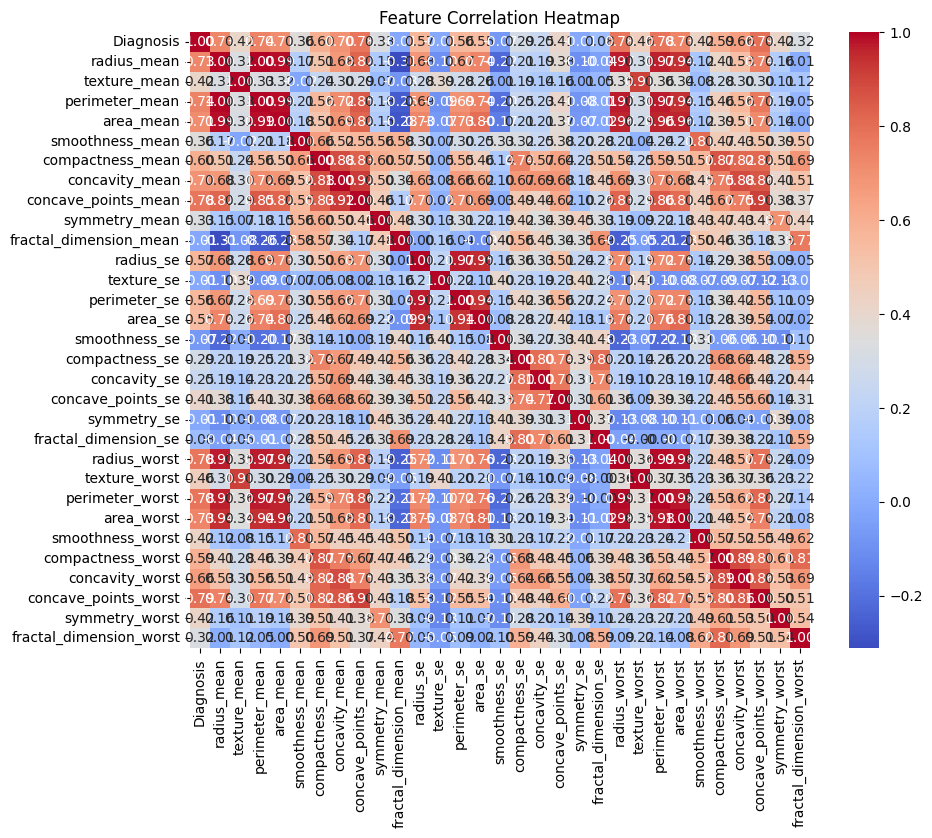

In [58]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### 2.3.4 Visualizing Feature Distributions with Histograms

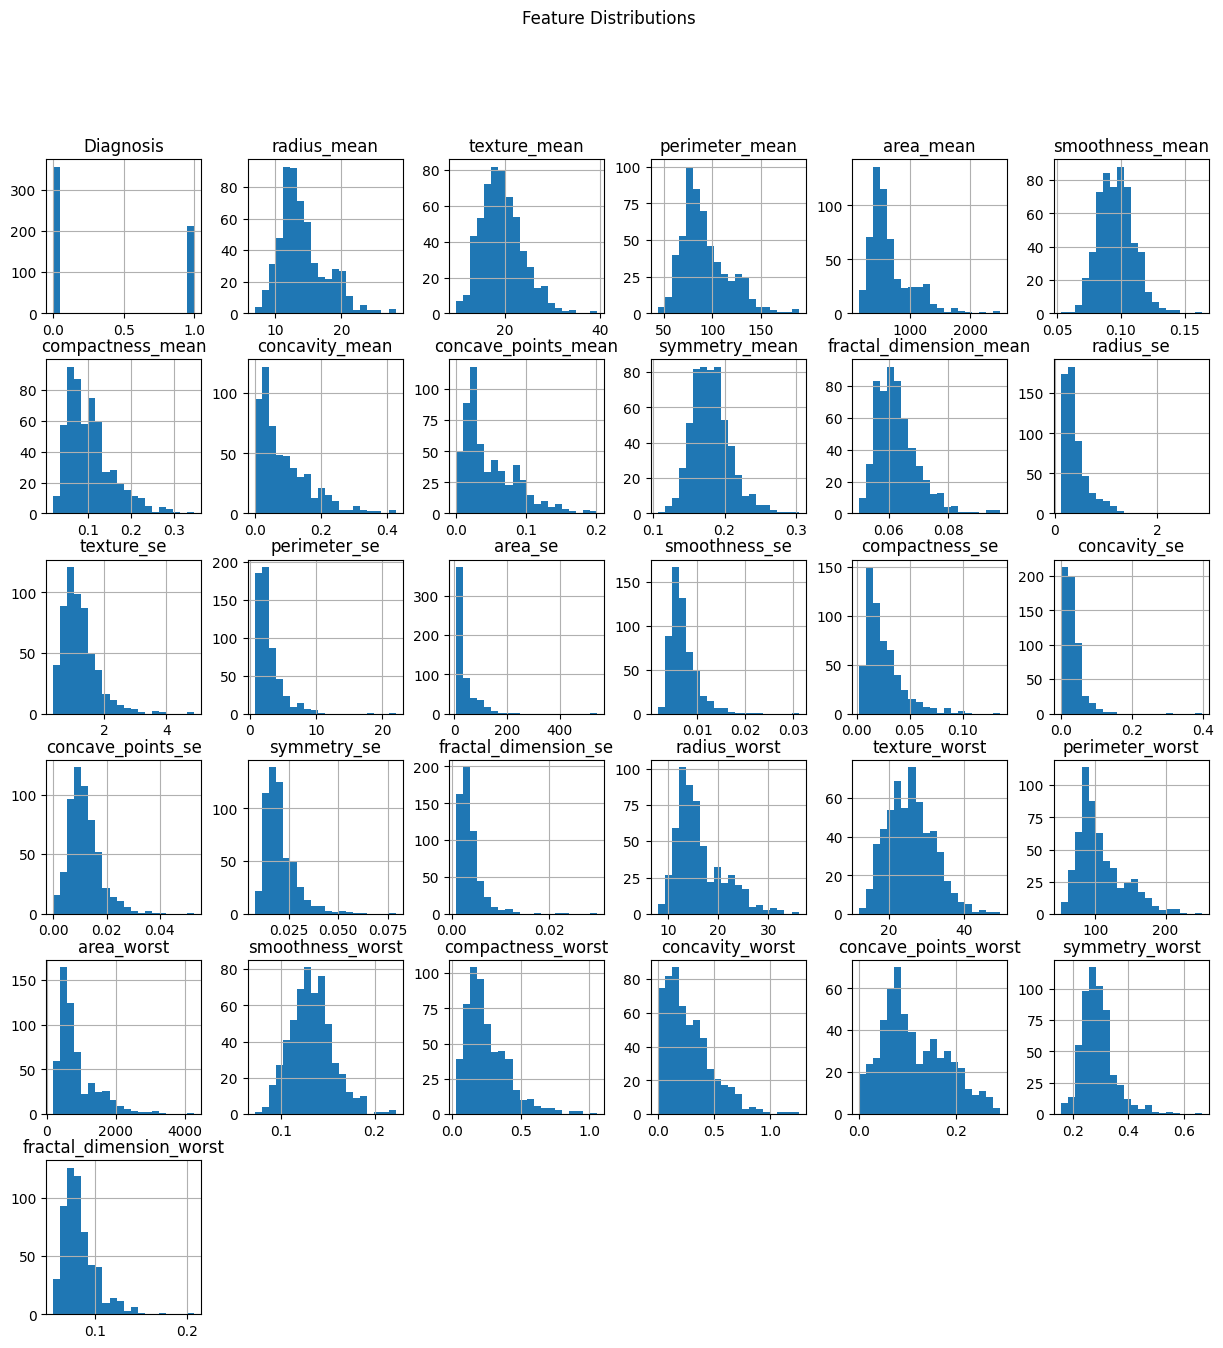

In [59]:
data.hist(figsize=(15, 15), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

### 2.3.5 Pair Plot of Radius, Texture, and Area by Diagnosis

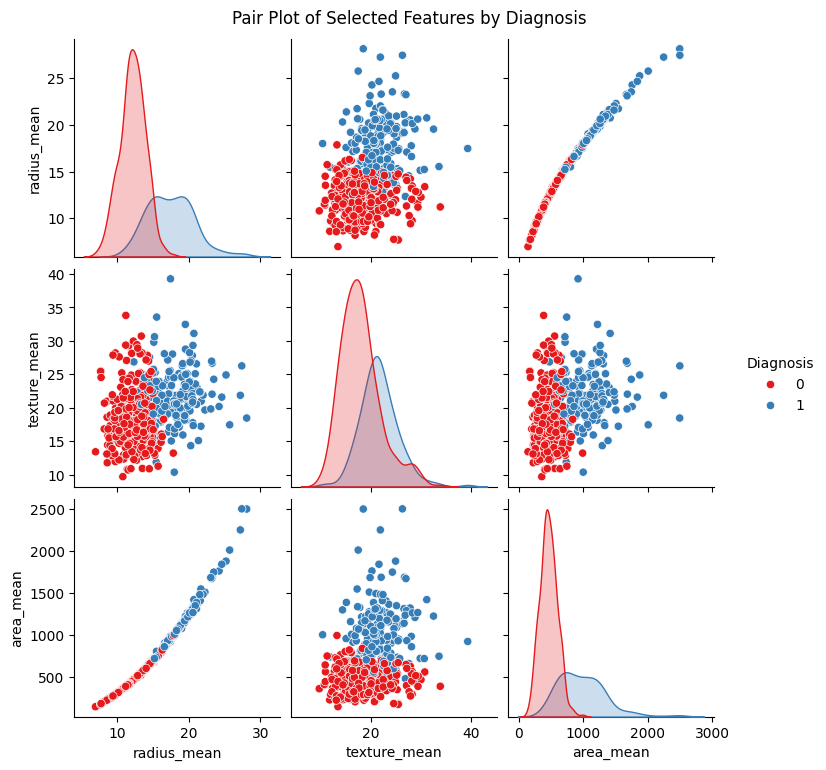

In [60]:
# Pair Plot of Radius, Texture, and Area by Diagnosis
pair_features = ["radius_mean", "texture_mean", "area_mean", "Diagnosis"]
sns.pairplot(data[pair_features], hue="Diagnosis", palette="Set1")
plt.suptitle("Pair Plot of Selected Features by Diagnosis", y=1.02)
plt.show()

### 2.3.6 Violin Plot of Compactness Mean by Diagnosis

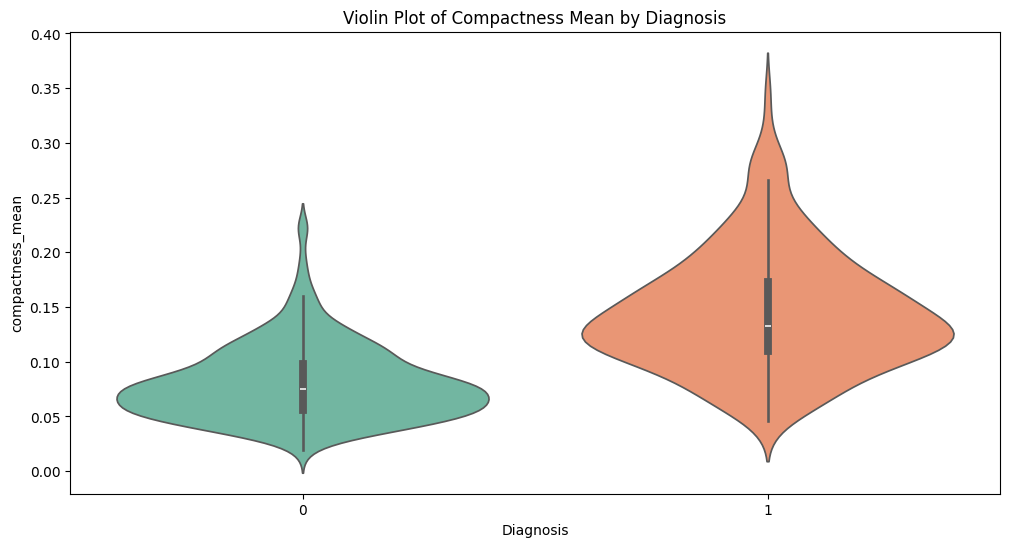

In [61]:
# Violin Plot for Compactness_mean by Diagnosis
plt.figure(figsize=(12, 6))
sns.violinplot(x="Diagnosis", y="compactness_mean", data=data, palette="Set2")
plt.title("Violin Plot of Compactness Mean by Diagnosis")
plt.show()

### 2.4 Train Test Data Split

In [62]:
# Train-Test Split data into training and test sets using the train_test_split function and stratification for balanced class distribution

X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21, stratify=y)

### 2.4.1 Normalizing the dataset to have a mean of 0 and a standard deviation of 1.
#### This is important for algorithms that are sensitive to the scale of data.

#To standardize the features, subtract the mean and divide by the standard deviation
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()  # Use train data stats for scaling

X_train_std .describe()

### 2.5 Performance Metrics and 10-Fold Cross-Validation
##### In this project, performance metrics and 10-fold cross-validation work together to assess model accuracy and reliability in predicting whether a case is malignant (cancerous) or benign (non-cancerous). Key metrics—accuracy, precision, recall (sensitivity), F1 score, and AUC help determine how well the model identifies true cases while minimizing false predictions. Using 10-fold cross-validation, the dataset is divided into 10 parts, rotating each as a test set to give a balanced average score. This approach ensures the model's performance is both accurate and consistent across different sections of data.

### 2.5.1 Function to Calculate Performance Metrics

In [63]:
# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    # If y_true is one-hot encoded (for LSTM), convert it back to binary labels
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:  # One-hot encoded format
        y_true = np.argmax(y_true, axis=1)
    
    # If y_pred is in one-hot format, convert it back to binary labels
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)
    
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    
    # Sensitivity and Specificity
    sensitivity = recall  # same as recall
    specificity = tn / (tn + fp)
    
    # Balanced Accuracy (BACC)
    bacc = (sensitivity + specificity) / 2
    
    # False Positive Rate (FPR) and False Negative Rate (FNR)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)
    
    # True Skill Statistic (TSS)
    tss = sensitivity + specificity - 1
    
    # Heidke Skill Score (HSS)
    hss = 2 * (tp * tn - fp * fn) / ((tp + fp) * (fp + tn) + (tp + fn) * (fn + tn))
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'BACC': bacc,
        'FPR': fpr,
        'FNR': fnr,
        'TSS': tss,
        'HSS': hss
    }

### 2.5.2 Implementing and Evaluating the KNN Model

In [64]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose different hyperparameters
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [65]:
# KNN performance metrics
knn_metrics = calculate_metrics(y_test, y_pred_knn)

### 2.5.3 Implementing and Evaluating the Random Forest Model

In [66]:
#  Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [67]:
# Random Forest performance metrics
rf_metrics = calculate_metrics(y_test, y_pred_rf)

### 2.5.4 Implementing and Evaluating the LSTM Model

In [68]:
#  LSTM Model
# Convert the DataFrames to NumPy arrays
X_train_lstm = X_train.values
X_test_lstm = X_test.values

##### 2.5.4.1 Reshaping data for LSTM 

In [69]:
# Reshaping data for LSTM (samples, timesteps, features)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))  # Add the third dimension
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

##### 2.5.4.2 One-hot encoding of labels for LSTM

In [70]:
# One-hot encoding of labels for LSTM
y_train_lstm = to_categorical(y_train, num_classes=2)
y_test_lstm = to_categorical(y_test, num_classes=2)

#### 2.5.4.3 Building the LSTM Model for Classification

In [71]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dense(2, activation='softmax'))
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 2.6 Train,Predict and performance measues for LSTM model

In [72]:
# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)

In [73]:
# Predict with LSTM
y_pred_lstm = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step


In [74]:
# LSTM performance metrics
lstm_metrics = calculate_metrics(y_test, y_pred_lstm)

### 2.7 Display performance for each model

In [75]:
# Convert each dictionary to a DataFrame
knn_df = pd.DataFrame(list(knn_metrics.items()), columns=['Metric', 'KNN'])

In [76]:
# Display as tables
print("\nKNN Performance Metrics:")
print(knn_df.to_string(index=False))


KNN Performance Metrics:
     Metric      KNN
   Accuracy 0.912281
  Precision 0.863636
     Recall 0.904762
   F1-Score 0.883721
        AUC 0.910714
Sensitivity 0.904762
Specificity 0.916667
       BACC 0.910714
        FPR 0.083333
        FNR 0.095238
        TSS 0.821429
        HSS 0.813360


In [77]:

rf_df = pd.DataFrame(list(rf_metrics.items()), columns=['Metric', 'Random Forest'])

In [78]:
print("\nRandom Forest Performance Metrics:")
print(rf_df.to_string(index=False))


Random Forest Performance Metrics:
     Metric  Random Forest
   Accuracy       0.964912
  Precision       0.952381
     Recall       0.952381
   F1-Score       0.952381
        AUC       0.962302
Sensitivity       0.952381
Specificity       0.972222
       BACC       0.962302
        FPR       0.027778
        FNR       0.047619
        TSS       0.924603
        HSS       0.924603


In [79]:
lstm_df = pd.DataFrame(list(lstm_metrics.items()), columns=['Metric', 'LSTM'])

In [80]:
print("\nLSTM Performance Metrics:")
print(lstm_df.to_string(index=False))


LSTM Performance Metrics:
     Metric     LSTM
   Accuracy 0.666667
  Precision 0.527778
     Recall 0.904762
   F1-Score 0.666667
        AUC 0.716270
Sensitivity 0.904762
Specificity 0.527778
       BACC 0.716270
        FPR 0.472222
        FNR 0.095238
        TSS 0.432540
        HSS 0.376511


### 2.8 Comparing the classifiers with selected parameters by using 10-Fold Cross-Validation
#### 10-Fold Cross-Validation Function for Models Evaluation

In [81]:
# Function to perform 10-Fold Cross-Validation for a model
def cross_val_model(model, X, y, is_lstm=False):
    # Initialize 10-fold cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    metrics = []

    for train_idx, val_idx in cv.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # If it's an LSTM model, reshape the input data
        if is_lstm:
            X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
            X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
            y_train = to_categorical(y_train, num_classes=2)
            y_val = to_categorical(y_val, num_classes=2)

        # Train the model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0) if is_lstm else model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_val)
        if is_lstm:
            y_pred = np.argmax(y_pred, axis=1)  # Convert predictions back to class labels

        # Calculate metrics
        fold_metrics = calculate_metrics(y_val, y_pred)
        metrics.append(fold_metrics)

    # Convert the list of metrics into a DataFrame for better readability
    metrics_df = pd.DataFrame(metrics)
    metrics_df.loc['Average'] = metrics_df.mean()  # Calculate the average of metrics across all folds
    return metrics_df

### 2.8.1 KNN Model Performance with 10-Fold Cross-Validation

In [82]:
# KNN Model (10-fold cross-validation)
knn = KNeighborsClassifier(n_neighbors=5)
knn_metrics = cross_val_model(knn, X, y)

### 2.8.2 Random Forest Model Performance with 10-Fold Cross-Validation

In [83]:
#  Random Forest Model (10-fold cross-validation)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_metrics = cross_val_model(rf, X, y)

### 2.8.3 LSTM Model Performance with 10-Fold Cross-Validation

In [84]:
#  LSTM Model (10-fold cross-validation)
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(2, activation='softmax'))
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

lstm_metrics = cross_val_model(lstm_model, X, y, is_lstm=True)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/stepWARNING:tensorflow:5 out of the last 27 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7623806495a0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━

### 2.8.4 Display Metrics for Each Model

In [85]:
print("Random Forest Cross-Validation Results:\n", rf_metrics)

Random Forest Cross-Validation Results:
          Accuracy  Precision    Recall  F1-Score       AUC  Sensitivity  \
0        0.947368   0.913043  0.954545  0.933333  0.948701     0.954545   
1        0.982456   0.956522  1.000000  0.977778  0.985714     1.000000   
2        0.964912   0.952381  0.952381  0.952381  0.962302     0.952381   
3        0.912281   0.944444  0.809524  0.871795  0.890873     0.809524   
4        0.947368   0.950000  0.904762  0.926829  0.938492     0.904762   
5        0.964912   1.000000  0.904762  0.950000  0.952381     0.904762   
6        0.964912   0.952381  0.952381  0.952381  0.962302     0.952381   
7        0.947368   0.875000  1.000000  0.933333  0.958333     1.000000   
8        0.929825   0.947368  0.857143  0.900000  0.914683     0.857143   
9        1.000000   1.000000  1.000000  1.000000  1.000000     1.000000   
Average  0.956140   0.949114  0.933550  0.939783  0.951378     0.933550   

         Specificity      BACC       FPR       FNR       T

In [86]:
# 5. Display Metrics for Each Model
print("KNN Cross-Validation Results:\n", knn_metrics)

KNN Cross-Validation Results:
          Accuracy  Precision    Recall  F1-Score       AUC  Sensitivity  \
0        0.929825   0.909091  0.909091  0.909091  0.925974     0.909091   
1        0.912281   0.869565  0.909091  0.888889  0.911688     0.909091   
2        0.947368   0.950000  0.904762  0.926829  0.938492     0.904762   
3        0.859649   0.933333  0.666667  0.777778  0.819444     0.666667   
4        0.929825   0.904762  0.904762  0.904762  0.924603     0.904762   
5        0.947368   1.000000  0.857143  0.923077  0.928571     0.857143   
6        0.947368   0.909091  0.952381  0.930233  0.948413     0.952381   
7        0.964912   0.913043  1.000000  0.954545  0.972222     1.000000   
8        0.947368   1.000000  0.857143  0.923077  0.928571     0.857143   
9        0.964286   1.000000  0.904762  0.950000  0.952381     0.904762   
Average  0.935025   0.938889  0.886580  0.908828  0.925036     0.886580   

         Specificity      BACC       FPR       FNR       TSS       H

In [87]:
print("LSTM Cross-Validation Results:\n", lstm_metrics)

LSTM Cross-Validation Results:
          Accuracy  Precision    Recall  F1-Score       AUC  Sensitivity  \
0        0.736842   0.629630  0.772727  0.693878  0.743506     0.772727   
1        0.894737   0.863636  0.863636  0.863636  0.888961     0.863636   
2        0.947368   0.950000  0.904762  0.926829  0.938492     0.904762   
3        0.859649   0.842105  0.761905  0.800000  0.839286     0.761905   
4        0.877193   0.818182  0.857143  0.837209  0.873016     0.857143   
5        0.912281   0.807692  1.000000  0.893617  0.930556     1.000000   
6        0.964912   1.000000  0.904762  0.950000  0.952381     0.904762   
7        0.964912   0.913043  1.000000  0.954545  0.972222     1.000000   
8        0.947368   1.000000  0.857143  0.923077  0.928571     0.857143   
9        0.946429   0.950000  0.904762  0.926829  0.938095     0.904762   
Average  0.905169   0.877429  0.882684  0.876962  0.900509     0.882684   

         Specificity      BACC       FPR       FNR       TSS       

### 2.9 Evaluating the performance of various algorithms by comparing their ROC curves and AUC scores on the test dataset.

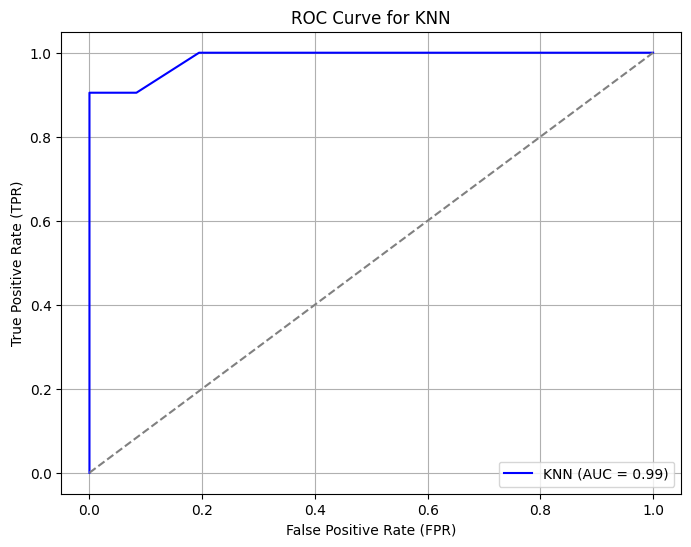

In [88]:
# ROC Curve for KNN
y_prob_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color="blue", label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

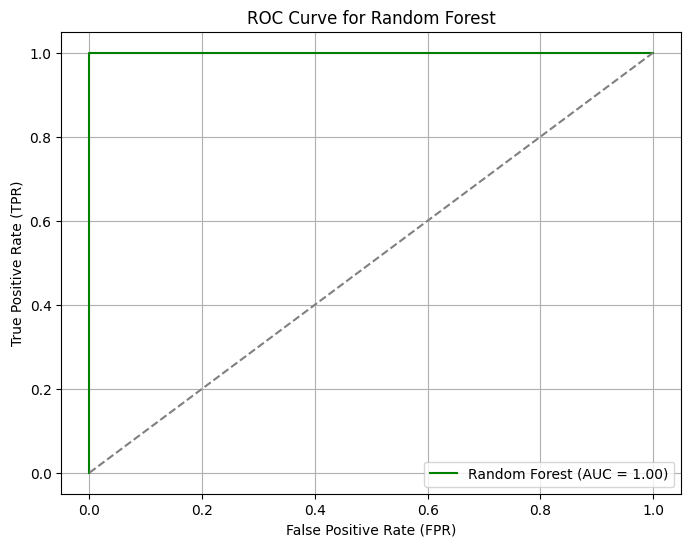

In [89]:
# ROC Curve for Random Forest
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color="green", label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


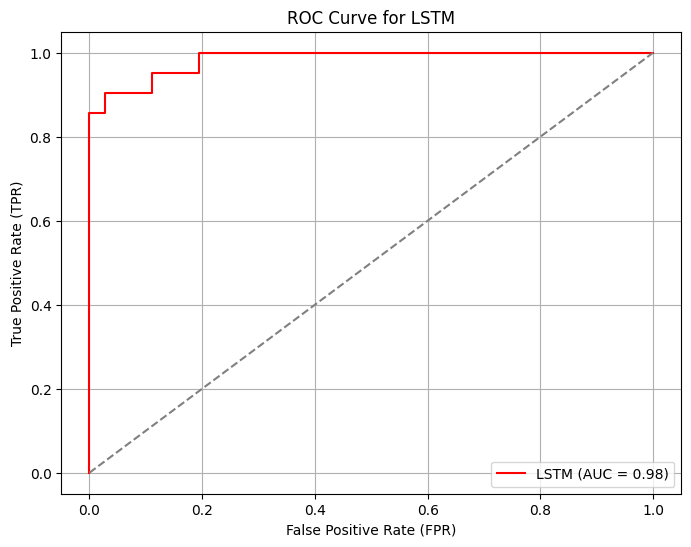

In [90]:
# ROC Curve for LSTM
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))  # Convert to numpy array and reshape
y_prob_lstm = lstm_model.predict(X_test_lstm)[:, 1]  # Get probability for class 1
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_prob_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color="red", label=f'LSTM (AUC = {auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for LSTM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 2.10 Evaluating the performance of various algorithms by comparing their Precision-Recall curve scores on the test dataset.

In [91]:
# Calculate Precision-Recall for each model
def plot_precision_recall_curve(y_test, y_pred_probs, model_name):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_probs)
    average_precision = average_precision_score(y_test, y_pred_probs)
    f1 = f1_score(y_test, (y_pred_probs > 0.5).astype(int))  # Using 0.5 threshold for F1 Score

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc="best")
    plt.show()

    # Display F1 score
    print(f'{model_name} - F1 Score (threshold=0.5): {f1:.2f}')

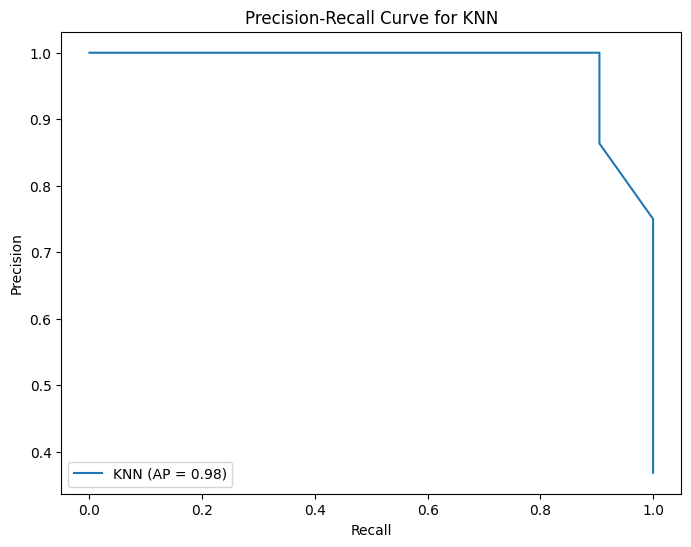

KNN - F1 Score (threshold=0.5): 0.90


In [92]:
# Plot for KNN
y_pred_probs_knn = knn.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, y_pred_probs_knn, "KNN")

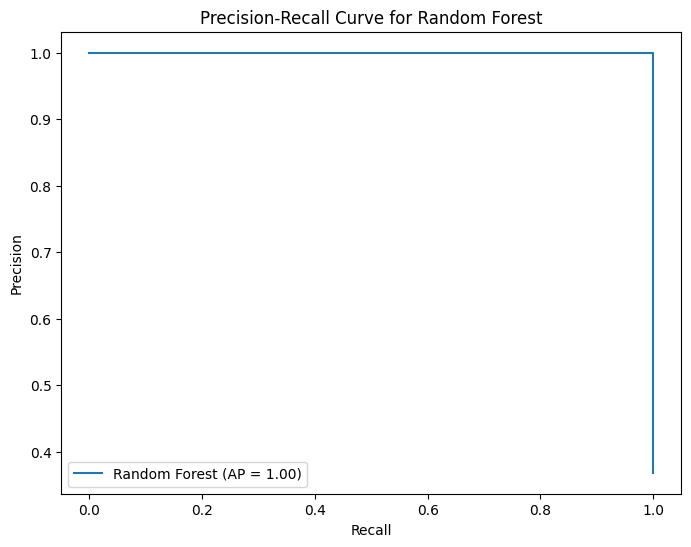

Random Forest - F1 Score (threshold=0.5): 1.00


In [93]:
# Plot for Random Forest
y_pred_probs_rf = rf.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, y_pred_probs_rf, "Random Forest")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


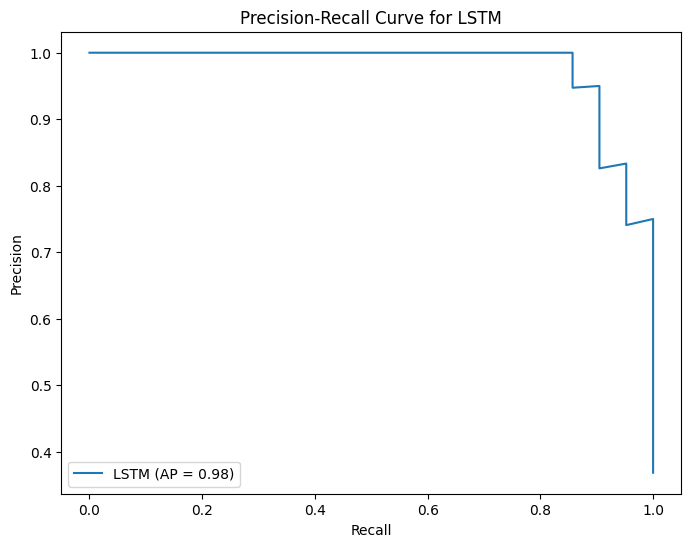

LSTM - F1 Score (threshold=0.5): 0.93


In [94]:
# Reshape X_test for LSTM model (samples, time steps, features)
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Get the predicted probabilities for the positive class
y_pred_probs_lstm = lstm_model.predict(X_test_reshaped)[:, 1]

# Plot Precision-Recall Curve for LSTM
plot_precision_recall_curve(y_test, y_pred_probs_lstm, "LSTM")